# Predicting Student Performance in High School Math 

This program uses machine learning regression and classification algorithms to predict the final math scores of students from two Portuguese schools, based on various demographic and social factors.  Using multiple linear regression and decision tree classification, the identification of important features, results of linearity testing, and model accuracy in predicting on new data is developed and displayed.  A summary of the results can be found at the bottom of this program.

Data Source: University of California, Irvine (UCI) Machine Learning Repository.

Please view the README for more details.

By: Melanie Grudinschi

In [1]:
#Import the necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import xgboost as xgb
import statsmodels.api as sm

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import datasets 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from itertools import combinations
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Read in the student mathematics grades csv files as a data frame
math = pd.read_csv('student-mat.csv')

In [3]:
# Display the first five rows of the student grades data frame
print(math.head())

# Display the column names in the student grades data frame
print(math.columns)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       '

In [4]:
# Display a summary of the data
math.info()

# Data contains 33 columns including both categorical and numerical data. All columns contain non-null data.
# Observe that the data types are not consistent for all variables (object and integer).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Map Catgorical Variables to Numeric Values

In [5]:
# Obtain names of the columns containing objects (categorical data)
cat_names=math.dtypes[math.dtypes=='object'].index

# Create a new dataframe named "cat_df" containing all of the categorical data of the main "math" dataset
cat_df=math[cat_names]

# Display the first five rows of the new "cat_df" data frame
print(cat_df.head())

  school sex address famsize Pstatus     Mjob      Fjob  reason guardian  \
0     GP   F       U     GT3       A  at_home   teacher  course   mother   
1     GP   F       U     GT3       T  at_home     other  course   father   
2     GP   F       U     LE3       T  at_home     other   other   mother   
3     GP   F       U     GT3       T   health  services    home   mother   
4     GP   F       U     GT3       T    other     other    home   father   

  schoolsup famsup paid activities nursery higher internet romantic  
0       yes     no   no         no     yes    yes       no       no  
1        no    yes   no         no      no    yes      yes       no  
2       yes     no  yes         no     yes    yes      yes       no  
3        no    yes  yes        yes     yes    yes      yes      yes  
4        no    yes  yes         no     yes    yes       no       no  


In [6]:
# Initialize an empty list for the names of columns which contain binary categorical data (2 options, Ex: Yes or No)
binary_list=[]

# Initialize a second empty list for the names of columns which contain non-binary categorical data (more than 2 options)
non_binary_list=[]

# Loop through all the columns in the "cat_df" data frame and if the column contains only binary data,
# add the name of that column to the binary list.  Else, add the column name to the non_binary_list.
for i in cat_df.columns:
    if (len(cat_df[i].unique())>2):
        non_binary_list.append(i)

    else:
        binary_list.append(i)

In [7]:
# Map symmetric binary categorical variables to numeric values

# Initialize an empty data frame named "new_num_df" which will store the newly mapped
# numerical data from the original "cat_df" categorical data
new_num_df = pd.DataFrame()
print(new_num_df)

Empty DataFrame
Columns: []
Index: []


In [8]:
# Loop through the columns in the binary column names list 
for i in range(0, len(binary_list)):
    
    # Obtain the 2 unqiue values cooresponding which each column 
    Unique_Values = cat_df[binary_list[i]].unique()
    
    # If parent's cohabitation status is T (living together) then assign a 1 to imply significance
    if binary_list[i] == 'Pstatus':
        
        if Unique_Values[0] == 'T':
            new_num_df[binary_list[i]] = cat_df[binary_list[i]].replace([Unique_Values[0]],1).replace([Unique_Values[1]],0)
        
        else:
            new_num_df[binary_list[i]] = cat_df[binary_list[i]].replace([Unique_Values[0]],0).replace([Unique_Values[1]],1)
    
    # For all other columns, if it is a yes/no, assign 1 to yes to imply significance
    elif Unique_Values[0] == 'yes':
        new_num_df[binary_list[i]] = cat_df[binary_list[i]].replace([Unique_Values[0]],1).replace([Unique_Values[1]],0)

    #  Assign 0 value to "no" observations
    elif Unique_Values[0] == 'no':
        new_num_df[binary_list[i]] = cat_df[binary_list[i]].replace([Unique_Values[0]],0).replace([Unique_Values[1]],1)
    
    # If the observed value is not yes/no, assign 0 and 1 at random (first unique value will be 1, second unique value will be 0)
    else:
        new_num_df[binary_list[i]] = cat_df[binary_list[i]].replace([Unique_Values[0]],1).replace([Unique_Values[1]],0)

# Display the "new_num_df" to ensure all of the binary categorical data has been mapped to 0s and 1s
print(new_num_df)

     school  sex  address  famsize  Pstatus  schoolsup  famsup  paid  \
0         1    1        1        1        0          1       0     0   
1         1    1        1        1        1          0       1     0   
2         1    1        1        0        1          1       0     1   
3         1    1        1        1        1          0       1     1   
4         1    1        1        1        1          0       1     1   
..      ...  ...      ...      ...      ...        ...     ...   ...   
390       0    0        1        0        0          0       1     1   
391       0    0        1        0        1          0       0     0   
392       0    0        0        1        1          0       0     0   
393       0    0        0        0        1          0       0     0   
394       0    0        1        0        1          0       0     0   

     activities  nursery  higher  internet  romantic  
0             0        1       1         0         0  
1             0        0 

In [9]:
# Map multiclass categorical variables to numeric values

# Loop through the columns in the non-binary column names list 
for i in range(0, len(non_binary_list)):
    
    # Obtain multiple unqiue values cooresponding which each column 
    Unique_Values = cat_df[non_binary_list[i]].unique()
    
    # Assign numeric values from 0 - 4 randomly based on the total number of unique values in that column
    if len(Unique_Values) == 3:
        new_num_df[non_binary_list[i]] = cat_df[non_binary_list[i]].replace([Unique_Values[0]],0).replace([Unique_Values[1]],1).replace([Unique_Values[2]],2)
    
    elif len(Unique_Values) == 4:
        new_num_df[non_binary_list[i]] = cat_df[non_binary_list[i]].replace([Unique_Values[0]],0).replace([Unique_Values[1]],1).replace([Unique_Values[2]],2).replace([Unique_Values[3]],3)
        
    elif len(Unique_Values) == 5:
        new_num_df[non_binary_list[i]] = cat_df[non_binary_list[i]].replace([Unique_Values[0]],0).replace([Unique_Values[1]],1).replace([Unique_Values[2]],2).replace([Unique_Values[3]],3).replace([Unique_Values[4]],4)

In [10]:
#There is a function that can be used to transform categorical data into integers.

#from sklearn.preprocessing import LabelEncoder
#LabelEncoder() and fit_transform()

# These functions were not used in this program because of the specific mapping that was needed.

In [11]:
# Create a data frame that contains all of the numeric data from the original "math" data frame 
num_names=math.dtypes[math.dtypes=='int64'].index
org_num_df=math[num_names]

# Display the first five rows of the new "org_num_df" data frame
print(org_num_df.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  
0     1     1       3         6   5   6   6  
1     1     1       3         4   5   5   6  
2     2     3       3        10   7   8  10  
3     1     1       5         2  15  14  15  
4     1     2       5         4   6  10  10  


In [12]:
# Combine the original numeric data with the newly mapped numerical data into a dataframe called "combined_table",
# containing all of the columns from the raw imported dataset
combined_table =pd.concat((org_num_df,new_num_df), axis=1)

# Display the first five rows of the new "combined_table" data frame
print(combined_table.head())

# Display the data types of all the columns to ensure all are now integers
print(combined_table.dtypes)

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  paid  activities  nursery  higher  internet  romantic  Mjob  \
0     1  ...     0           0        1       1         0         0     0   
1     1  ...     0           0        0       1         1         0     0   
2     2  ...     1           0        1       1         1         0     0   
3     1  ...     1           1        1       1         1         1     1   
4     1  ...     1           0        1       1         0         0     2   

   Fjob  reason  guardian  
0     0       0         0  


# Apply Multiple Linear Regression ML Model

In [13]:
# Randomly split the data into 20% testing and 80% training
train, test = train_test_split(combined_table, test_size = 0.2, random_state = 2022)

# Display the dimensions of the training and testing data
print('Size of the train dataset is', train.shape)
print('Size of the test dataset is', test.shape)

# Split training data into x (independent variables) and y (dependent variable)

# Assign all of the columns except G3 (final mathematics grade from 0-20) to be x 
x_train = train.loc[:, train.columns != 'G3']

# Assign G3 (final mathematics grade from 0-20) to be y
y_train = train['G3']

x_test = test.loc[:, test.columns != 'G3']
y_test = test['G3']

Size of the train dataset is (316, 33)
Size of the test dataset is (79, 33)


In [14]:
#Plot pairwise scatter plot to analyze initial trends and highly coorelated variables

# This command takes a long time to execute.  If you have the computing power,
# please uncomment the next line to see the pairplot.

#sns.pairplot(train)

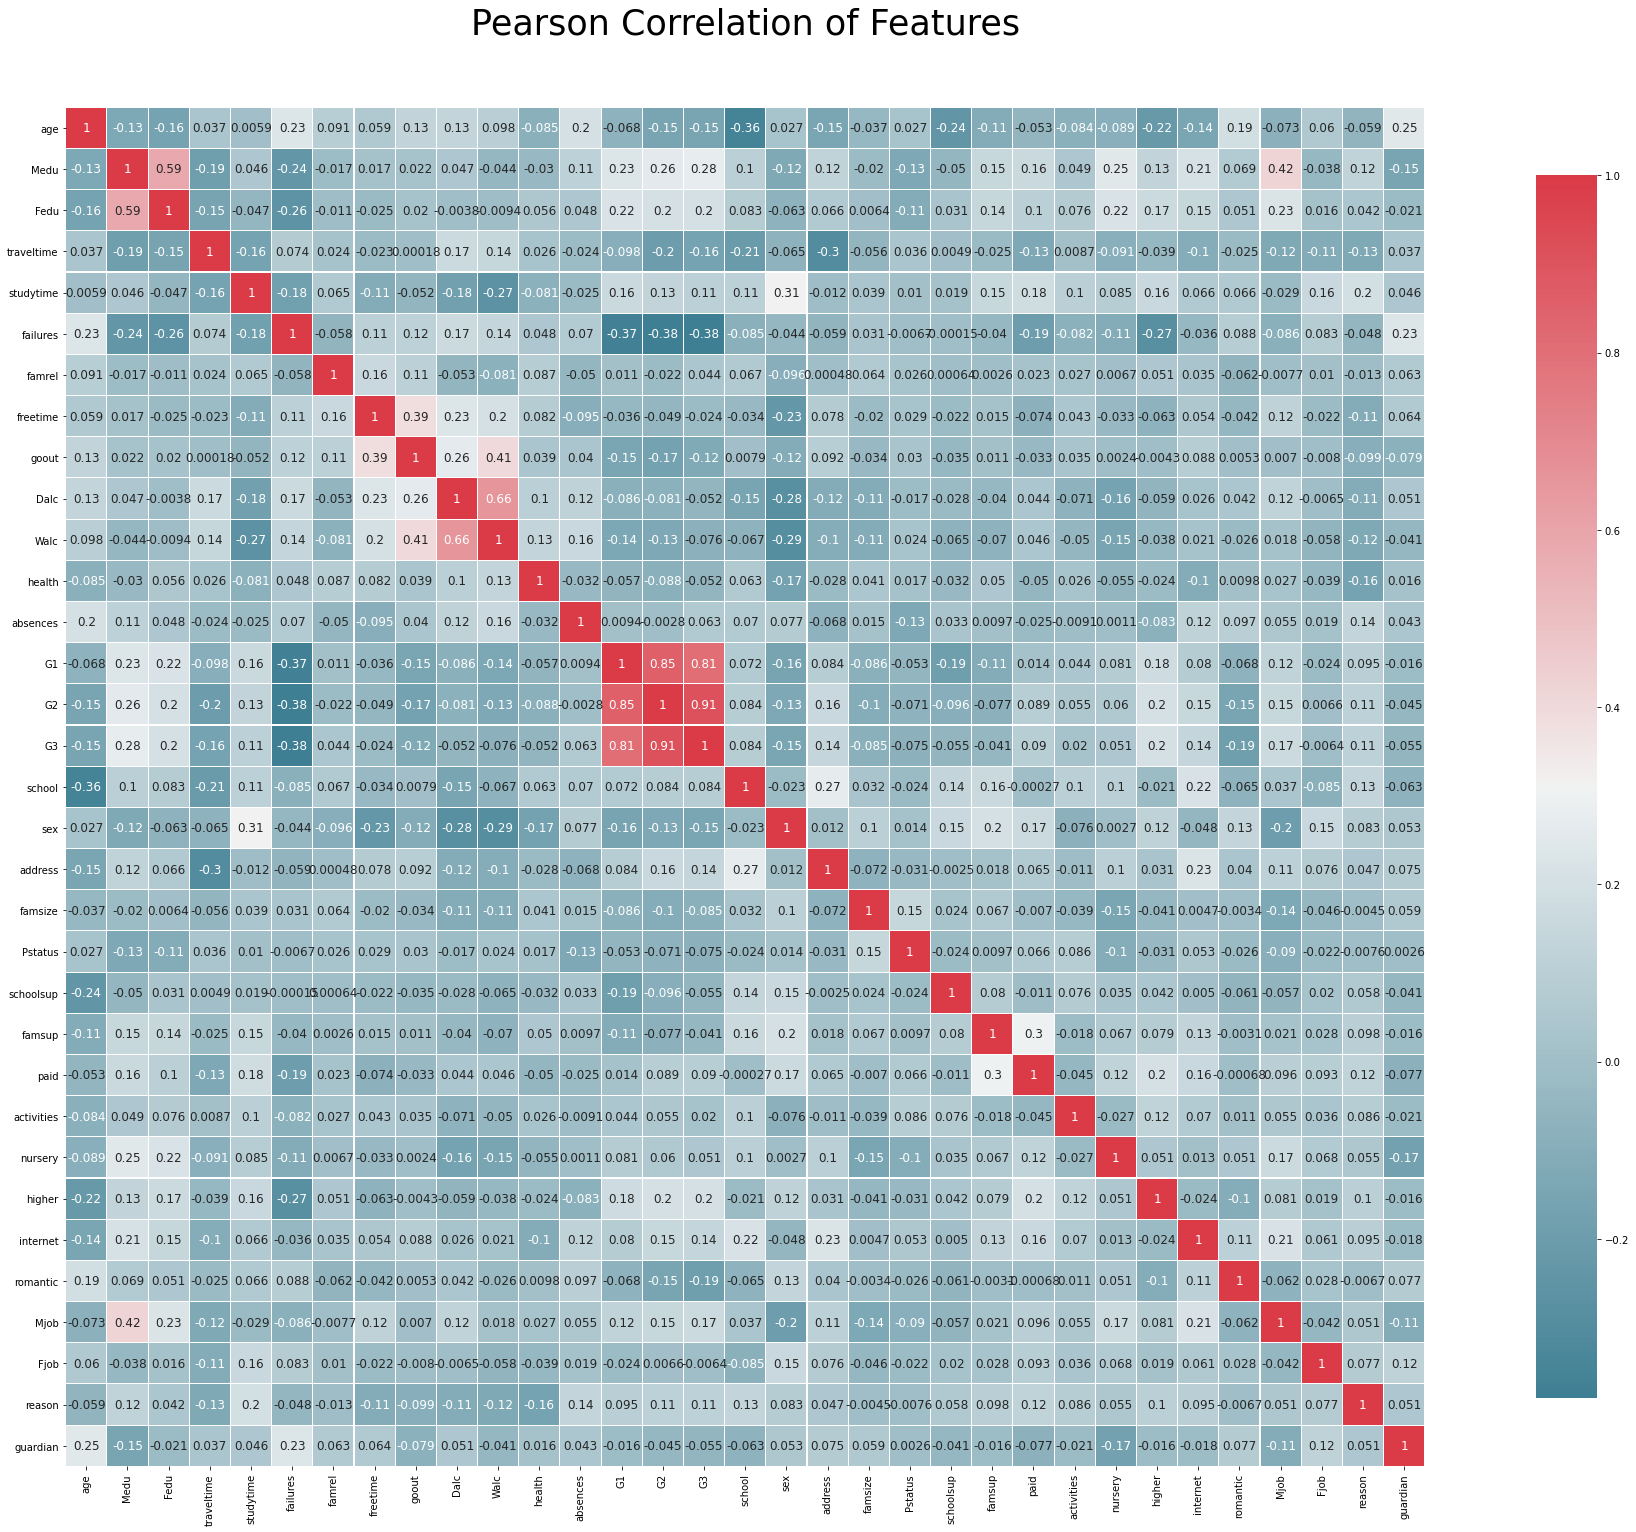

In [15]:
# Define a function for creating a correlation heatmap
def create_correlation_heatmap(data):
    _ , ax = plt.subplots(figsize =(40, 25)) 
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    sns.heatmap(
        data.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=35)

# Plot the heatmap using the entire training dataset to analyze feature coorelation 
create_correlation_heatmap(train)

# Observe a few instances of highly coorelated variables (coorelation >.5 or >-.5)

# Mitigate Highly Coorelated Independent Variables

In [16]:
# It is important to have mitigate or remove highly coorelated variables from a linear regression model because 
# highly coorelated variables indicate high model variance and can lead to an unreliable/ unstable model.

# G1 (first period grade) and G2 (second period grade) have a high positive coorelation.
# Walc (weekend alcohol consumption) and Dalc (workday alcohol consumption) have a high positive coorelation.
# Medu (mother’s education) and Fedu (father's education) have a high positive coorelation.

# To remove the negative impacts of high coorelation, a weighted average of each of the two coorelated values was 
# calculated and counted for as a new variable. 
# G1 and G2 were combined into "Avg_G1&G2".
# Walc and Dalc were combined into "Avg_Alc". 
# Medu and Fedu were combined into "Avg_Par_Edu".

# Create separate data frames containing the data for each highly coorelated variable
G1_df = combined_table['G1']
G2_df = combined_table['G2']
Walc_df = combined_table['Walc']
Dalc_df = combined_table['Dalc']
Medu_df = combined_table['Medu']
Fedu_df = combined_table['Fedu']

# Initialize empty lists for each new weighted average value to be added to 
Avg_G12 = []
Avg_Alc = []
Avg_Par_Edu = []


# Loop through all the rows in the combined data set
for i in range(0, len(G1_df)):
    
    # Calculated the weighted average for each of the three highly coorelated sets separately
    Avg_G_Value = int((G1_df[i] + G2_df[i]) / 2)
    Avg_Alc_Value = int(((5*Dalc_df[i]) + (2*Walc_df[i])) / 7)
    Avg_Par_Edu_Value = int((Medu_df[i] + Fedu_df[i]) / 2)

    # Append the new average value to the respective weighted average list
    Avg_G12.append(Avg_G_Value)
    Avg_Alc.append(Avg_Alc_Value)
    Avg_Par_Edu.append(Avg_Par_Edu_Value)

    
# Add each list of newly averaged values to the respective empty data frame
Avg_G_Table = pd.DataFrame(Avg_G12)
Avg_Alc_Table = pd.DataFrame(Avg_Alc)
Avg_Par_Edu_Table = pd.DataFrame(Avg_Par_Edu)

# Rename the column of average values to the appropriate name for each separate data frame
Avg_G_Table.rename(columns = {0: 'Avg_G1&G2'}, inplace = True)
Avg_Alc_Table.rename(columns = {0: 'Avg_Alc'}, inplace = True)
Avg_Par_Edu_Table.rename(columns = {0: 'Avg_Par_Edu'}, inplace = True)

# Combine the originial "combined_table" data frame used for the first linear regression analysis 
# with the new data frames containing the weighted averages.
Averages_df =pd.concat((Avg_G_Table, Avg_Alc_Table, Avg_Par_Edu_Table, combined_table), axis=1)

# Display the data types of each column of the new data frame containing the average values of the 
# previously high coorelated variables to ensure they are all integers.
print(Averages_df.dtypes)

Avg_G1&G2      int64
Avg_Alc        int64
Avg_Par_Edu    int64
age            int64
Medu           int64
Fedu           int64
traveltime     int64
studytime      int64
failures       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
school         int64
sex            int64
address        int64
famsize        int64
Pstatus        int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
Mjob           int64
Fjob           int64
reason         int64
guardian       int64
dtype: object


In [17]:
# Create a new data frame called "Uncoorelated_df" containing only low coorelated variables by 
# removing the highly coorelated variables from the data frame and keeping the averaged values.
Uncoorelated_df = Averages_df.drop(['G2', 'G1', 'Fedu', 'Medu', 'Walc', 'Dalc'], axis=1)
print(Uncoorelated_df)

     Avg_G1&G2  Avg_Alc  Avg_Par_Edu  age  traveltime  studytime  failures  \
0            5        1            4   18           2          2         0   
1            5        1            1   17           1          2         0   
2            7        2            1   15           1          2         3   
3           14        1            3   15           1          3         0   
4            8        1            3   16           1          2         0   
..         ...      ...          ...  ...         ...        ...       ...   
390          9        4            2   20           1          2         2   
391         15        3            2   17           2          1         0   
392          9        3            1   21           1          1         3   
393         11        3            2   18           3          1         0   
394          8        3            1   19           1          1         0   

     famrel  freetime  goout  ...  paid  activities  nursery  h

In [18]:
# Perform a random split on the new uncoorelated dataset into 20% testing and 80% training
uncoor_train, uncoor_test = train_test_split(Uncoorelated_df, test_size = 0.2, random_state = 2021)

# Display the dimensions of the new training and new testing data
print('Size of the train dataset is ', uncoor_train.shape)
print('Size of the test dataset is ', uncoor_test.shape)

# Split training data into x (independent variables) and y (dependent variable)

# Assign all of the columns except G3 (final mathematics grade from 0-20) to be the new uncoorelated x 
uncoor_x_train = uncoor_train.loc[:, uncoor_train.columns != 'G3']

# Assign G3 (final mathematics grade from 0-20) to be y
uncoor_y_train = uncoor_train['G3']

uncoor_x_test = uncoor_test.loc[:, uncoor_test.columns != 'G3']
uncoor_y_test = uncoor_test['G3']

Size of the train dataset is  (316, 30)
Size of the test dataset is  (79, 30)


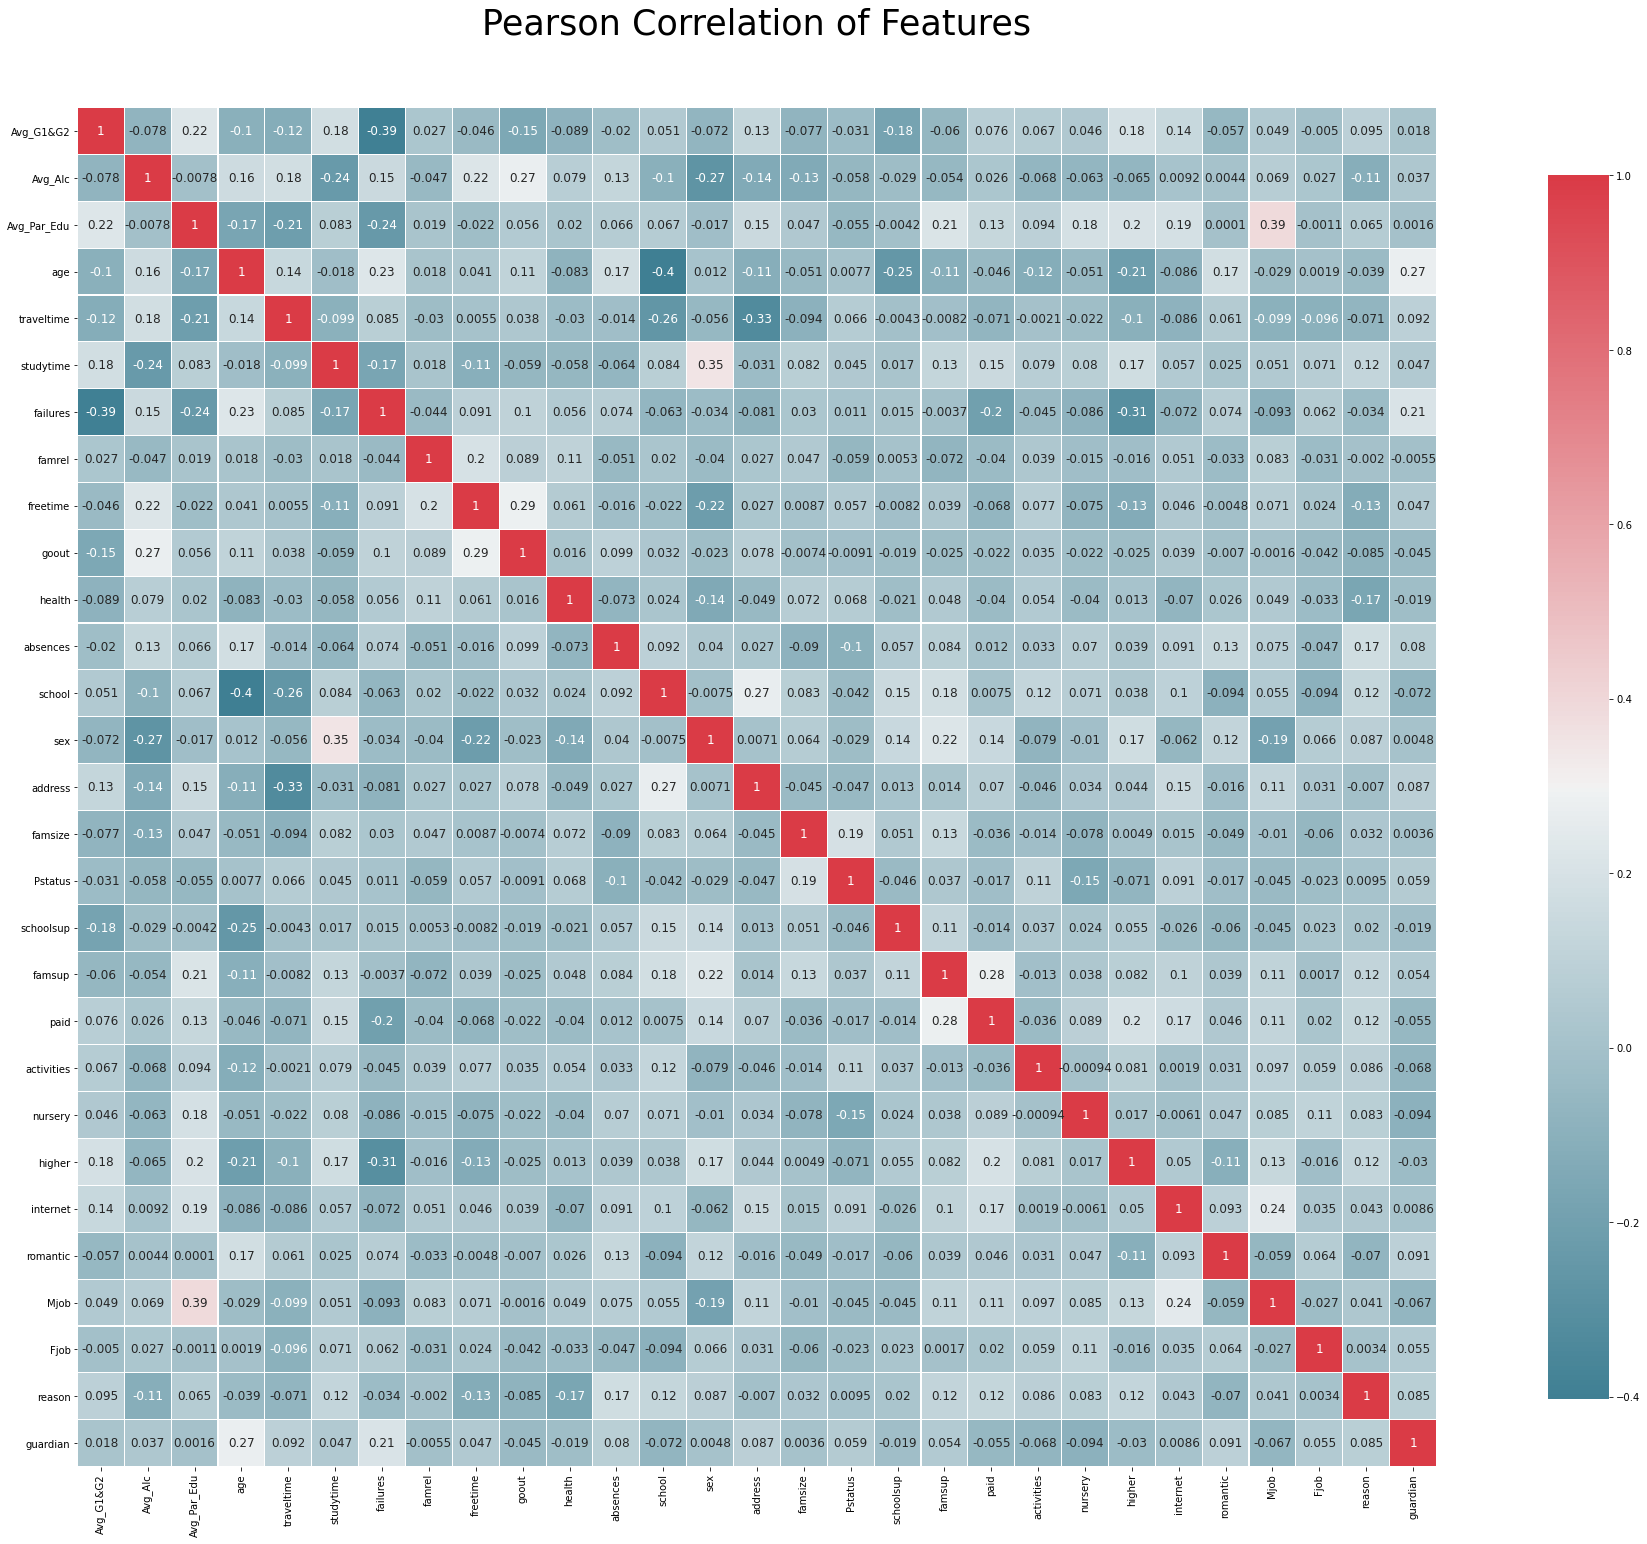

In [19]:
# Plot the new heatmap using the entire uncoorelated training dataset to analyze feature coorelation and correction 
create_correlation_heatmap(uncoor_x_train)

# Observe that there are no instances of extremly positive or negative coorelation

In [20]:
# Fit a Multiple Linear Regression (MLR) model to the training data
linear_regression = LinearRegression()
linear_regression.fit(uncoor_x_train, uncoor_y_train)

# Display the y intercept and coefficients of the MLR model
print('The intercept estimated by Sklearn is', round(linear_regression.intercept_,3))
print('The coefficients estimated by Sklearn are:',linear_regression.coef_)

The intercept estimated by Sklearn is 1.437
The coefficients estimated by Sklearn are: [ 1.23563601  0.03068752 -0.02571503 -0.23242223 -0.02530547 -0.24781729
 -0.08524729  0.27445552  0.03787983  0.05116432  0.06472663  0.05501262
 -0.5935353  -0.09798499  0.11610519 -0.02176417 -0.18447538  0.73082502
  0.05520577  0.34549593 -0.31707647 -0.32967602 -0.2797912  -0.30169945
 -0.38896107  0.00555177 -0.06748769  0.0661223  -0.23370326]


In [21]:
# Alternative method of calculating the model coefficients using the formula
inverse_matrix = np.linalg.inv(np.dot(uncoor_x_train.T, uncoor_x_train))
hat_matrix = np.dot(inverse_matrix, uncoor_x_train.T)
est_coeff = np.dot(hat_matrix, uncoor_y_train)
print('Coefficients estimated by the formula are:', est_coeff)

# Observe similar results to the Sklearn package estimated coefficients

Coefficients estimated by the formula are: [ 1.23987952e+00  3.08355865e-02 -1.20445645e-02 -1.76024328e-01
  2.42206348e-04 -2.49367300e-01 -7.67945158e-02  2.84753953e-01
  4.87940688e-02  4.80013977e-02  7.36685699e-02  5.33974715e-02
 -4.88694869e-01 -9.14223008e-02  1.34767115e-01 -1.60982175e-02
 -1.39264391e-01  7.74892439e-01  5.39200508e-02  3.44336574e-01
 -3.18175775e-01 -3.15749372e-01 -1.68666193e-01 -2.83910625e-01
 -3.94183815e-01  1.47245747e-03 -5.67397129e-02  6.92190640e-02
 -2.63802418e-01]


In [22]:
#Check the significance of parameters by applying ordinary least squares (OLS) regression on the training data
lr = sm.OLS(uncoor_y_train, uncoor_x_train)
lr = lr.fit()

# Display the summary to check for model linearity and significant features
print(lr.summary())
      
# Observe an R^2 value of .969 and adjusted R^2 value of .966 (adjusting for non-significant features). 
# Since R^2 is very close to 1, this indicates that the data fits one of the linearity assumptions. 
# Since the data is linear, the MLR model should predict new data with a fairly high accuracy.

# Variables with a low p-value <.05 (on a 95% confidence interval) are classified as significant.
# Observing the output table, the significant variables include Avg_G1&G2(.000), age(.005), 
# famrel(.046), absences(.002), schoolsup(.033).

# The least significant variables from observing the table are Avg_Par_Edu (p = .931), traveltime (p = .999),
# famsize (p =.954), and Mjob (p =.99).

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              308.9
Date:                Sun, 13 Nov 2022   Prob (F-statistic):                   2.83e-198
Time:                        15:39:10   Log-Likelihood:                         -667.55
No. Observations:                 316   AIC:                                      1393.
Df Residuals:                     287   BIC:                                      1502.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [23]:
# Predict new instances of student's grades in math (y) using the x testing data and a linear regression model
y_predict = linear_regression.predict(uncoor_x_test)

((array([-2.84925316, -2.55442126, -2.38761145, -2.26880689, -2.1753769 ,
         -2.09779005, -2.03109353, -1.97237057, -1.9197528 , -1.87196863,
         -1.82811193, -1.78751329, -1.7496636 , -1.71416629, -1.68070617,
         -1.64902841, -1.61892396, -1.59021905, -1.56276768, -1.53644588,
         -1.51114751, -1.48678091, -1.4632664 , -1.44053424, -1.41852303,
         -1.39717839, -1.37645198, -1.35630056, -1.33668534, -1.31757136,
         -1.29892697, -1.2807235 , -1.26293479, -1.24553699, -1.22850824,
         -1.21182846, -1.19547919, -1.17944337, -1.16370524, -1.14825018,
         -1.13306464, -1.11813598, -1.10345244, -1.08900304, -1.0747775 ,
         -1.06076619, -1.0469601 , -1.03335073, -1.01993012, -1.00669073,
         -0.99362549, -0.9807277 , -0.96799103, -0.95540948, -0.94297738,
         -0.93068934, -0.91854025, -0.90652524, -0.8946397 , -0.88287922,
         -0.87123959, -0.85971682, -0.84830709, -0.83700674, -0.82581227,
         -0.81472034, -0.80372776, -0.

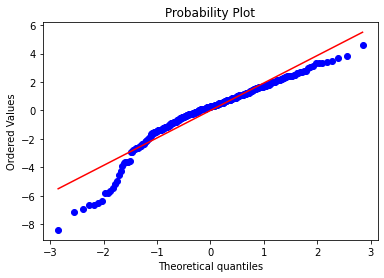

In [24]:
# Create a quantile-quantile plot to assess the second linearity assumption
stats.probplot(uncoor_y_train - linear_regression.predict(uncoor_x_train), dist="norm", plot=plt)

# Observe that the data falls closely to the red line (with some variability on the lower left side),
# indicating the normality assumption for linear regression is met.

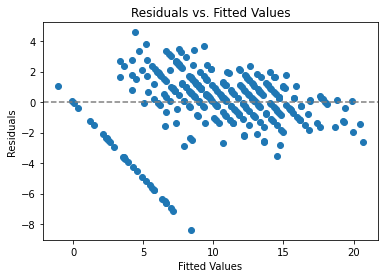

In [25]:
# Plot the residuals vs fitted values to analyze the linear model assumption
residuals = uncoor_y_train - linear_regression.predict(uncoor_x_train)
plt.scatter(linear_regression.predict(uncoor_x_train), residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y = 0, color = 'grey', ls = '--')

# Observe that the residuals are mostly spread along the horizontal line and no distinct pattern is shown, therefore the 
# linear model assumption is met.

Text(0.5, 1.0, 'Scale-Location')

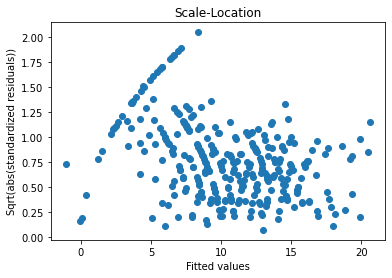

In [26]:
# Create a scale-location plot to test the equal variance assumption
standardized_residuals = (residuals - residuals.mean()) / residuals.std()
plt.scatter(linear_regression.predict(uncoor_x_train), np.sqrt(abs(standardized_residuals)))
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(abs(standardized residuals))')
plt.title('Scale-Location')

# Observe that the majority of the standardized residuals are equally spread around .75, therefore the  equal 
# variance assumption is met.

In [27]:
# Create a data frame with two columns (true values from the testing dataset and predicted values based on the regression model)
compare = pd.DataFrame({'True Value': uncoor_y_test, 'Predicted Value': y_predict})

# Reset the index and drop the 'index' column because the true y test value has a row index already in place
compare.reset_index(inplace = True)
compare = compare.drop(['index'], axis = 1)

# Round the predicted values to the nearest thousandth
compare['Predicted Value'] = round(compare['Predicted Value'], 3)


# Display the first 5 rows of the comparison data frame
compare.head()

# Observe that the predicted values are similar to the true values.  MSE calculated later.

,True Value,Predicted Value
0,12,13.085
1,9,9.351
2,11,11.851
3,9,9.650
4,13,13.298


Text(0.5, 1.0, 'True vs. Predicted Values')

<Figure size 576x432 with 0 Axes>

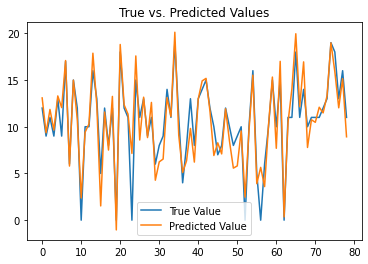

In [28]:
# Plot the true vs predicted values to visualize differences
plt.figure(figsize=(8,6))
compare.plot()
plt.title('True vs. Predicted Values')

Plot residuals in testing dataset

Text(0.5, 1.0, 'Residual Plot')

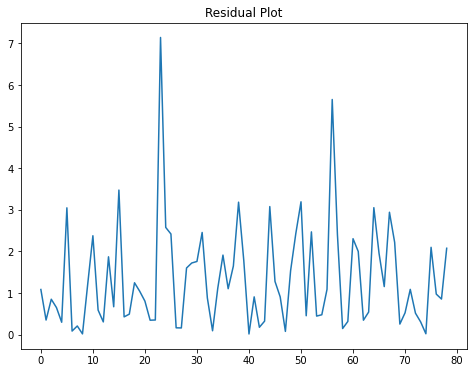

In [29]:
# Plot the residuals (difference between predicted values and true values) to analyze model performance
plt.figure(figsize=(8,6))
plt.plot(abs(compare['Predicted Value'] - compare['True Value']))
plt.title('Residual Plot')

# Observe that the majority of the error is centered around 2-3 points from the true value.

In [30]:
# Assess model performance using the mean squared error (MSE)

#Calculate MSE for the linear regression model
MSE_Linear_Reg = mean_squared_error(uncoor_y_test, y_predict)
print('MSE for the linear regression model is', round(MSE_Linear_Reg,3))

# Observing a low MSE of 3.39, it can be accepted that the linear regression model fits the data
# (given the data contained a low number of total observations (rows))

MSE for the linear regression model is 3.39


# Using*XGBoost* for Important Feature Identification

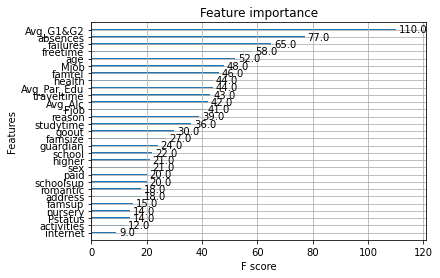

In [31]:
# Fit an XGBoost regressor with 100 estimators to the training data 
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(uncoor_x_train,uncoor_y_train)

# Plot the significant features that contribute the most to the prediction of the dependent variable (math scores)
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [40, 40]
plt.show()

# A higher F score indicates a higher importance. 
# Observe that the most significant features from this model are Avg_G1&G2, absences, failures, freetime and age.
# The least significant factors are internet, activites, and PStatus.

# Random Forest Regression for Prediction and Feature Importance


 1) Avg_G1&G2            0.752555
 2) absences             0.121720
 3) age                  0.017826
 4) traveltime           0.011333
 5) health               0.010602
 6) studytime            0.009100
 7) failures             0.008477
 8) guardian             0.006999
 9) famrel               0.006657
10) goout                0.006413
11) Mjob                 0.005121
12) Avg_Par_Edu          0.005024
13) Fjob                 0.004101
14) activities           0.004011
15) schoolsup            0.003427
16) school               0.003400
17) freetime             0.003111
18) reason               0.002889
19) nursery              0.002580
20) paid                 0.002395
21) Avg_Alc              0.002322
22) famsize              0.002129
23) famsup               0.001718
24) address              0.001699
25) sex                  0.001093
26) romantic             0.000950
27) internet             0.000866
28) higher               0.000768
29) Pstatus              0.000711


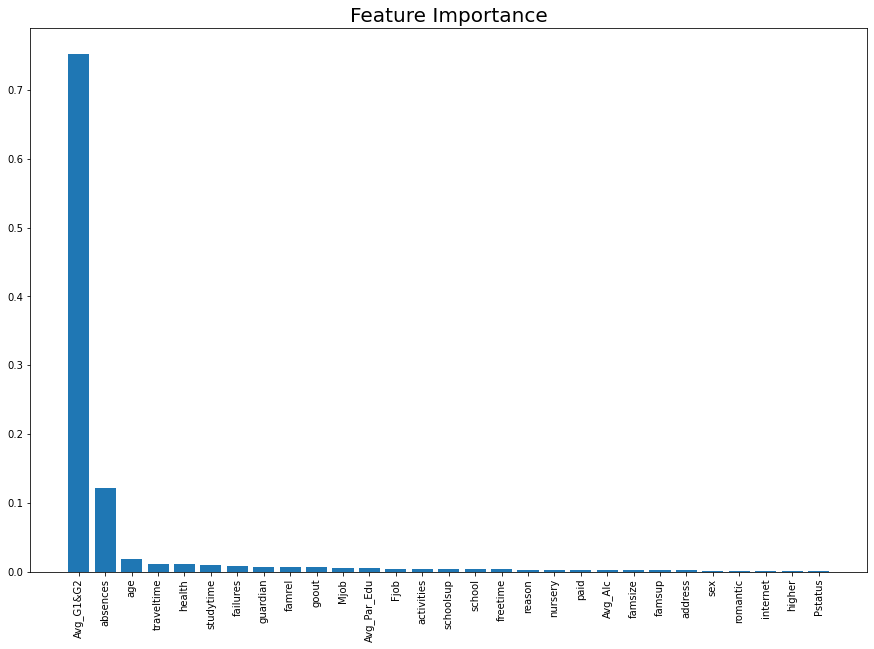

In [32]:
# Fit a random forest regression model to the training data
Random_F_Reg = RandomForestRegressor(n_estimators=100)
Random_F_Reg.fit(uncoor_x_train, uncoor_y_train)

# Set the features equal to the column names of the training data
features = uncoor_x_train.columns

# Identify the important features using the feature_importances_ built in function
importances = Random_F_Reg.feature_importances_

# Sort the important features from most important to least important
indices = np.argsort(importances)
sorted_indices = np.argsort(importances)[::-1]

# Print the important features in order from greatest to least
for f in range(uncoor_x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 20, features[sorted_indices[f]], importances[sorted_indices[f]]))

# Plot the important features using a vertical bar chart 
plt.figure(figsize=(15,10))
plt.title('Feature Importance', size = 20)
plt.bar(range(uncoor_x_train.shape[1]), importances[sorted_indices], align = 'center')
plt.xticks(range(uncoor_x_train.shape[1]), uncoor_x_train.columns[sorted_indices], rotation = 90)
plt.show()

# Observing the output, the most important features in the prediction of y are Avg_G1&G2, absences, age, famrel, and studytime.
# The least important are  Pstatus, romantic, internet, and higher.

In [33]:
# Predict course grades using the random forest regressor on the test data
y_pred_RFR = Random_F_Reg.predict(uncoor_x_test) 

# Calculate and display the mean absolute error and mean squared error for the model
MAE = mean_absolute_error(uncoor_y_test, y_pred_RFR)
MSE = mean_squared_error(uncoor_y_test, y_pred_RFR)

print('MAE: ', round(MAE,3))
print('MSE: ', round(MSE, 3))

# Create a dataframe that contains the true vs predicted values
compare_RFR = pd.DataFrame({'Real Value': uncoor_y_test, 'Predict Value': y_pred_RFR})

# Reset the index and drop the 'index' column because the true y test value has a row index already in place
compare_RFR.reset_index(inplace = True)
compare_RFR = compare_RFR.drop(['index'], axis = 1)
compare_RFR.head()

MAE:  1.174
MSE:  2.495


,Real Value,Predict Value
0,12,12.25
1,9,8.55
2,11,12.28
3,9,9.96
4,13,14.10


Text(0.5, 1.0, 'Real value vs. Predict Value')

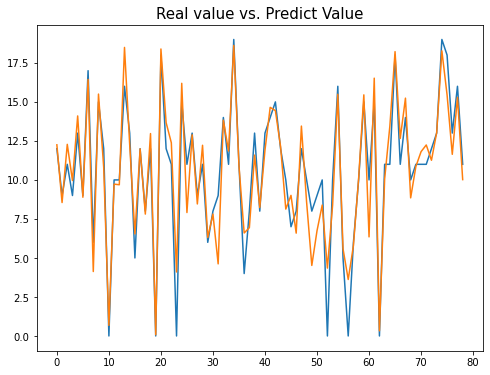

In [34]:
# Plot the true vs predicted values to visualize differences
plt.figure(figsize=(8,6))
plt.plot(compare_RFR)
plt.title('Real value vs. Predict Value', size = 15)

# Predicting using ML Classification Methods

Convert continious data to discrete by mapping grade value integers to letter grade objects.  Set a threshold for assigning letter grades. 
Class 1: 0-5 -> D , Class 2: 6-10 -> C, Class 3: 11-15 -> B, Class 4: 16-20 -> A

In [35]:
# Create a data frame containing only the G3 (final math grade) data
G3_df = Uncoorelated_df['G3']

# Initialize an empty list for the new letter grade strings to be added to 
Letter_Grades_List = []


# Loop through all the rows in the subsetted G3 dataframe
for i in range(0, len(G3_df)):
    
    # For grades between 0-5 assign the letter D
    if (G3_df[i] <= 5):
        Letter_Grade = 'D'
    
    # For grades between 6-10 assign the letter C
    elif (G3_df[i] >= 6 and G3_df[i] <= 10):
        Letter_Grade = 'C'

    # For grades between 11-15 assign the letter B
    elif (G3_df[i] >= 11 and G3_df[i] <= 15):
        Letter_Grade = 'B'
        
    # For grades between 16-20 assign the letter A
    elif (G3_df[i] >= 16 and G3_df[i] <= 20):
        Letter_Grade = 'A'
    
    # Append the letter grade to the list on each iteration
    Letter_Grades_List.append(Letter_Grade)
    
    
# Add the letter grade list to the letter grades data frame
Letter_Grade_Table = pd.DataFrame(Letter_Grades_List)


# Rename the column of letter grades to the appropriate name
Letter_Grade_Table.rename(columns = {0: 'LetterGrade'}, inplace = True)


# Combine the originial "Uncoorelated_df" data frame used for the regression analysis 
# with the new letter grade dataframe.
Classification_df = pd.concat((Letter_Grade_Table, Uncoorelated_df), axis=1)

# Display the G3 grade and Letter Grade to verify the mapping was done correctly
print(Classification_df['G3'])
print(Classification_df['LetterGrade'])

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64
0      C
1      C
2      C
3      B
4      C
      ..
390    C
391    A
392    C
393    C
394    C
Name: LetterGrade, Length: 395, dtype: object


In [36]:
# Create a new data frame called "Classification_df_Updated" to update the "Classification_df" by removing the G3 column.
Classification_df_Updated = Classification_df.drop(['G3'], axis=1)
print(Classification_df_Updated)

    LetterGrade  Avg_G1&G2  Avg_Alc  Avg_Par_Edu  age  traveltime  studytime  \
0             C          5        1            4   18           2          2   
1             C          5        1            1   17           1          2   
2             C          7        2            1   15           1          2   
3             B         14        1            3   15           1          3   
4             C          8        1            3   16           1          2   
..          ...        ...      ...          ...  ...         ...        ...   
390           C          9        4            2   20           1          2   
391           A         15        3            2   17           2          1   
392           C          9        3            1   21           1          1   
393           C         11        3            2   18           3          1   
394           C          8        3            1   19           1          1   

     failures  famrel  freetime  ...  p

In [37]:
# Perform a random split on the new dataset containing letter grdaes into 20% testing and 80% training
LG_train, LG_test = train_test_split(Classification_df_Updated, test_size = 0.2, random_state = 2021)

# Display the dimensions of the new training and new testing data
print('Size of the train dataset is', LG_train.shape)
print('Size of the test dataset is', LG_test.shape)

# Split training data into x (independent variables) and y (dependent variable)

# Assign all of the columns except LetterGrade to be the new x 
LG_x_train = LG_train.loc[:, LG_train.columns != 'LetterGrade']

# Assign LetterGrade to be y
LG_y_train = LG_train['LetterGrade']

LG_x_test = LG_test.loc[:, LG_test.columns != 'LetterGrade']
LG_y_test = LG_test['LetterGrade']

Size of the train dataset is (316, 30)
Size of the test dataset is (79, 30)


In [38]:
# Fit the SVM algorithm to the training data
SVM_classifier = SVC(kernel='poly')
SVM_classifier.fit(LG_x_train, LG_y_train)

# Test the model by prediciting the letter grade of the test data
y_pred_SVM = SVM_classifier.predict(LG_x_test)

# Display the SVM model accuracy
print('SVM Model Accuracy:' , round(accuracy_score(LG_y_test, y_pred_SVM),4))

SVM Model Accuracy: 0.8101


In [39]:
# Fit the random forest algorithm to the training data
RF_classifier = RandomForestClassifier(n_estimators = 200)
RF_classifier.fit(LG_x_train, LG_y_train)

# Test the model by prediciting the letter grade of the test data
y_pred_RF = RF_classifier.predict(LG_x_test)

# Display the Random Forest model accuracy
print('Random Forest Model Accuracy:' , round(accuracy_score(LG_y_test, y_pred_RF),4))

Random Forest Model Accuracy: 0.8228


# PCA for Dimension Reduction

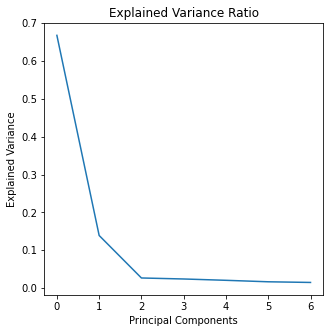

In [40]:
# Set the number of PCA components (adjust as necessary)
num_components = 7

# Fit PCA to the training data
pca = PCA(n_components = num_components)
train_features = pca.fit_transform(LG_x_train)

# Plot the explained variance ratio
plt.subplots(figsize=(5, 5))
plt.plot(range(0,num_components), pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')
plt.show()

# Observe that about 7 components explains 100% of the model variance

In [41]:
# Create new x training and testing data based on the reduced number of PCA components
X_train_PCA = pca.fit_transform(LG_x_train)
X_test_PCA = pca.transform(LG_x_test)

# Apply random forest model to newly reduced data
New_RF_classifier = RandomForestClassifier(n_estimators = 200)
New_RF_classifier.fit(X_train_PCA, LG_y_train)

# Test the model by prediciting the letter grade of the test data with PCA reduction applied
y_pred_PCA = New_RF_classifier.predict(X_test_PCA)

# Display the new RF accuracy score
print('Random Forest Model Accuracy with PCA reduction:' , round(accuracy_score(LG_y_test, y_pred_PCA),4))

# Observe that the model accuracy improves by ~ 4 - 10% when using PCA reduction.

Random Forest Model Accuracy with PCA reduction: 0.8481


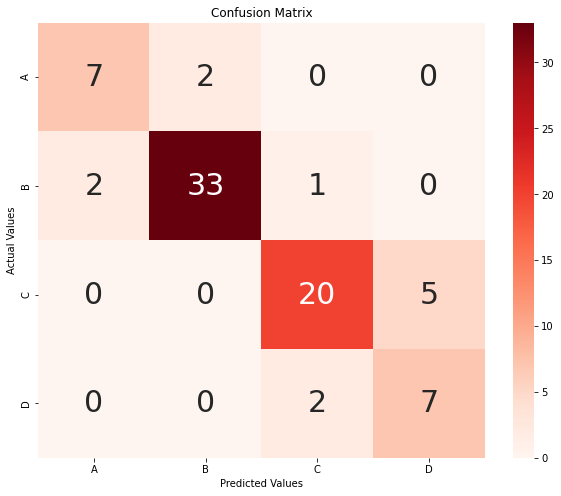

In [42]:
# Create a confusion matrix comparing the true to predicted values
conf_mx = confusion_matrix(LG_y_test, y_pred_PCA)

# Create the labels for the x and y ticks of the confusion matrix
Tick_labels = ['A', 'B', 'C', 'D']

# Use the seaborn heatmap function to create a visual of the confusion matrix 
plt.figure(figsize = (10,8))
Conf_Mx_Plot = sns.heatmap(conf_mx, annot = True, annot_kws = {"size": 30},cmap = 'Reds', yticklabels = Tick_labels, xticklabels = Tick_labels)
Conf_Mx_Plot.set(title='Confusion Matrix')
Conf_Mx_Plot.set(xlabel='Predicted Values', ylabel='Actual Values')
plt.show()

# Observe that the classes are imbalanced.  The data contains more instances of B and C. 
# To truly evaluate the model accuracy, use the classification report to analyze precision, recall, and F-1 score.

In [43]:
print("RF Classification Report:\n")
print(classification_report(LG_y_test, y_pred_PCA))

# Observe that the precision and recall is the highest for the B class, giving it the highest F-1 score. 
# The lowest F-1 score occurs for class A.

RF Classification Report:

              precision    recall  f1-score   support

           A       0.78      0.78      0.78         9
           B       0.94      0.92      0.93        36
           C       0.87      0.80      0.83        25
           D       0.58      0.78      0.67         9

    accuracy                           0.85        79
   macro avg       0.79      0.82      0.80        79
weighted avg       0.86      0.85      0.85        79



# Overall Results

The high school student math performance data from two Portuguese schools fits a linear model because the normality, linearity, and equal variance assumptions are all met.  In other words, the independent variables (demographic and social factors) have a linear relationship with the dependent target variable (G3 - final math grade).  Using multiple linear regression, the model is able to use the social and demographic data features to accurately predict high school student final math grades with a mean squared error of 3.39.  The most significant features that influence a students’ math score from the linear regression model is their average first and second period grade, age, quality of family relationships, number of school absences, and extra educational support.  The least significant features which impact the prediction of new student grades are average mother and father education, home to school travel time, family size, and mother's job.

Using the XGBoost regression model, the most important features impacting final grade prediction are average first and second period grades, number of school absences, number of past class failures, and free time after school.  The least significant features are internet access at home, extra-curricular activities, and parent's cohabitation status.  

Using the random forest regression model, the most significant features that influence a students’ math score is their average first and second period grade, number of school absences, age, and weekly study time.  The least important features include their parent's cohabitation status, desire to take higher education, and internet access at home.  The mean squared error in predicting students' math scores is 2.278 using random forest regression which is slightly lower than the multiple linear regression model.  This means it is slightly better to use the random forest regression model when predicting new data versus the linear regression model.

There are some similarities and some differences between the feature importance with multiple linear regression versus XGBoost regression versus random forest regression.  Overall, the most significant features appear to be first and second period grade, number of school absences, and students' age.

When predicting the letter grade (A-D) in math for new students, an SVM model predicted the scores with about 81% accuracy, while the random forest classification model was about 84% accurate.  After applying principal component analysis, the random forest model accuracy was increased to about 88%.  The classification report for the random forest model with PCA showed the highest F-1 score with the B class and lowest for the A class.